In [19]:
import pandas as pd
from sklearn.decomposition import PCA
import seaborn as sns
import numpy as np

In [3]:
iris_data = pd.read_csv('iris.data', header=None)
iris_data

,0,1,2,3,4
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [4]:
iris_data.columns = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'class']
iris_data.head()

,sepal_length,sepal_width,petal_length,petal_width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [5]:
iris_data.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [7]:
data_features = iris_data.drop(labels='class', axis=1)
data_features.head()

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [8]:
data_target = iris_data['class']
data_target.head()

0    Iris-setosa
1    Iris-setosa
2    Iris-setosa
3    Iris-setosa
4    Iris-setosa
Name: class, dtype: object

In [23]:
pca_instance = PCA(n_components=2)
features_reduced = pca_instance.fit_transform(data_features)
print(f"features_reduced shape: {features_reduced.shape}, first few entries: {features_reduced[:5]}")

features_reduced shape: (150, 2), first few entries: [[-2.68420713  0.32660731]
 [-2.71539062 -0.16955685]
 [-2.88981954 -0.13734561]
 [-2.7464372  -0.31112432]
 [-2.72859298  0.33392456]]


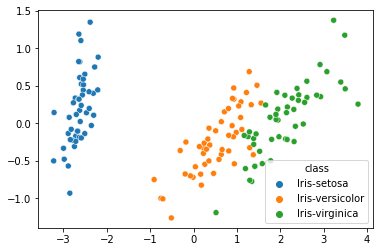

In [16]:
sns.scatterplot(x=features_reduced[:, 0], y=features_reduced[:, 1], hue=data_target);

# K means Clustering Algorithm from Scratch

In [18]:
data_numpy = data_features.to_numpy()
data_numpy.shape

(150, 4)

In [62]:
k = 3

rng = np.random.default_rng()

# create random cluster centers
cluster_centers = np.zeros((k, data_numpy.shape[1]))
for i in range(k):
    random_index = int(150 * rng.random())
    cluster_centers[i] = data_numpy[random_index]
print(f"Centers: {cluster_centers}")

cluster_centers_reduced = pca_instance.transform(cluster_centers)
print(f"Centers reduced by PCA: {cluster_centers_reduced}")

iteration_counter = 0

old_cluster_centers = np.zeros((k, data_numpy.shape[1]))
while np.linalg.norm(old_cluster_centers - cluster_centers) > 0:
    cluster_per_datapoint = np.zeros(data_numpy.shape[0])
    for i in range(data_numpy.shape[0]):
        distances = [np.linalg.norm(data_numpy[i] - center) for center in cluster_centers]
        nearest_center = np.argmin(distances)
        cluster_per_datapoint[i] = nearest_center

    old_cluster_centers = cluster_centers.copy()
    cluster_centers = np.zeros((k, data_numpy.shape[1]))
    for i in range(k):
        cluster_centers[i] = np.average(data_numpy[cluster_per_datapoint == i], axis=0)
    iteration_counter += 1

print(f"Finished {iteration_counter} iterations!")

Centers: [[4.4 3.  1.3 0.2]
 [4.4 2.9 1.4 0.2]
 [7.2 3.2 6.  1.8]]
Centers reduced by PCA: [[-2.98184266 -0.48025005]
 [-2.88795857 -0.57079803]
 [ 2.61419383  0.55836695]]
Finished 13 iterations!


<AxesSubplot:>

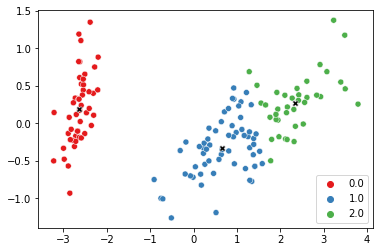

In [63]:
cluster_centers_reduced = pca_instance.transform(cluster_centers)
sns.scatterplot(x=features_reduced[:, 0], y=features_reduced[:, 1], hue=cluster_per_datapoint, palette='Set1');
sns.scatterplot(x=cluster_centers_reduced[:, 0], y=cluster_centers_reduced[:, 1], color='black', marker='X')

<AxesSubplot:>

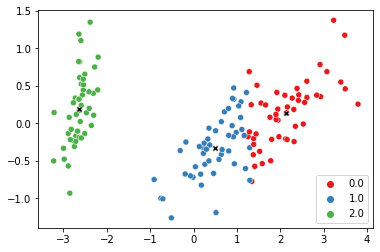

In [53]:
sns.scatterplot(x=features_reduced[:, 0], y=features_reduced[:, 1], hue=cluster_per_datapoint, palette='Set1');
sns.scatterplot(x=new_cluster_centers_reduced[:, 0], y=new_cluster_centers_reduced[:, 1], color='black', marker='X')